In [ ]:
!git clone https://github.com/PreethiGuru/Online-Shoppers-Purchasing-Intention.git

Cloning into 'Online-Shoppers-Purchasing-Intention'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [ ]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [ ]:
# Read our dataset
Data = pd.read_csv('/content/Online-Shoppers-Purchasing-Intention/online_shoppers_intention.csv')

In [ ]:
Data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
Data1= Data[Data['Revenue']==False]
Data1 = Data1.loc[1:2000]
Data2 = Data[Data['Revenue']==True]
frames = [Data1, Data2]
Data = pd.concat(frames)
Data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,2.504693,90.113182,0.558595,40.493288,33.217485,1305.856409,0.015322,0.034444,14.436025,0.022902,2.083937,2.358541,3.038348,3.577367
std,3.357706,183.806913,1.334127,144.466966,46.906698,1898.240050,0.042135,0.043280,28.653582,0.120892,0.856797,1.672136,2.368965,3.556485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,249.000000,0.000000,0.011111,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,18.333333,0.000000,0.000000,19.000000,692.622222,0.000000,0.020000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,101.500000,0.000000,0.000000,38.000000,1530.248485,0.009091,0.037267,18.503217,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,16.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
Data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,2.504693,90.113182,0.558595,40.493288,33.217485,1305.856409,0.015322,0.034444,14.436025,0.022902,2.083937,2.358541,3.038348,3.577367
std,3.357706,183.806913,1.334127,144.466966,46.906698,1898.240050,0.042135,0.043280,28.653582,0.120892,0.856797,1.672136,2.368965,3.556485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,249.000000,0.000000,0.011111,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,18.333333,0.000000,0.000000,19.000000,692.622222,0.000000,0.020000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,101.500000,0.000000,0.000000,38.000000,1530.248485,0.009091,0.037267,18.503217,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,16.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Data Preprocessing
Data.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
Data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

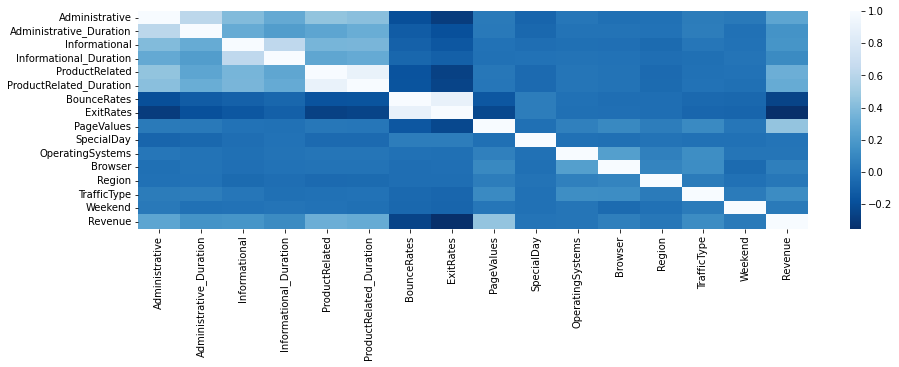

In [ ]:
plt.figure(figsize=(15,4))
f_cor = Data.corr()
sns.heatmap(f_cor,cmap= "Blues_r")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



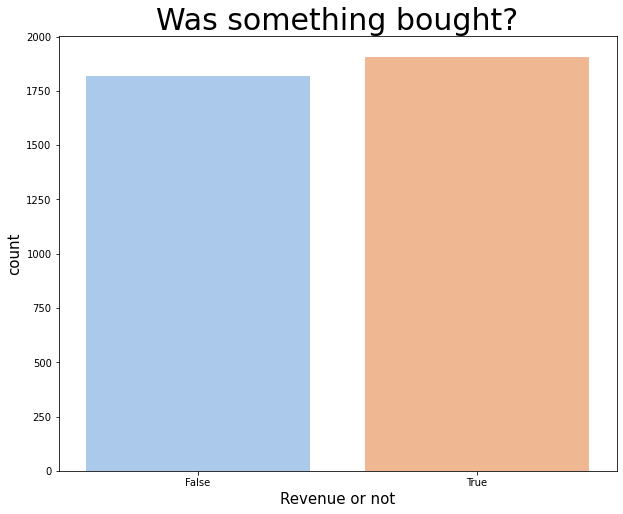

In [ ]:
# Checking the distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 8)

sns.countplot(Data['Revenue'], palette = 'pastel')
plt.title('Was something bought?', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [ ]:
y = Data["Revenue"]
X = pd.get_dummies(Data)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Data['Revenue'] = le.fit_transform(Data['Revenue'])
Data['Revenue'].value_counts()

1    1908
0    1821
Name: Revenue, dtype: int64

In [ ]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Removing the target column revenue from X
X = X.drop(['Revenue'], axis = 1)


# Checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3729, 28)
Shape of y: (3729,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=10000)
sfs_lr = SequentialFeatureSelector(model_lr, n_features_to_select = 10, cv =5, direction='forward')
sfs_lr.fit(X_train, y_train)
print(X.columns[sfs_lr.get_support()])

Index(['BounceRates', 'ExitRates', 'PageValues', 'Browser', 'Region',
       'TrafficType', 'Month_Aug', 'Month_Feb', 'Month_Mar', 'Month_Nov'],
      dtype='object')


In [ ]:
X_train_sfs = sfs_lr.transform(X_train)
X_test_sfs = sfs_lr.transform(X_test)

model_lr.fit(X_train_sfs, y_train)
y_pred_lr = model_lr.predict(X_test_sfs)

Training Accuracy : 0.9674824002681864
Testing Accuracy : 0.9571045576407506


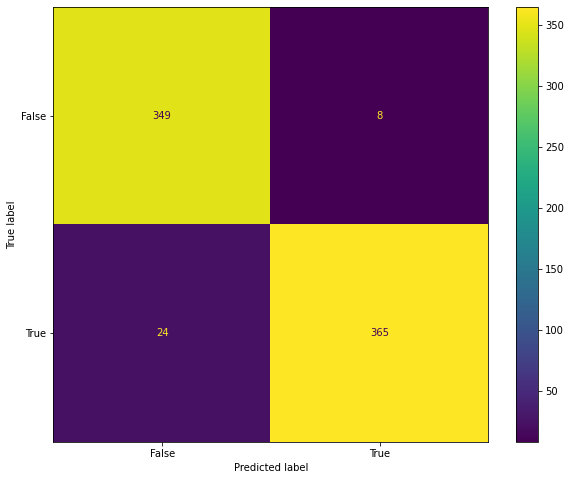

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       357
        True       0.98      0.94      0.96       389

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746



In [ ]:
print("Training Accuracy :", model_lr.score(X_train_sfs, y_train))
print("Testing Accuracy :", model_lr.score(X_test_sfs, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_lr)
print(cr)

In [ ]:
# Linear SVM Model
from sklearn.svm import LinearSVC
model_SVM_lin = LinearSVC(random_state = 0, dual = False)
sfs_SVM_lin = SequentialFeatureSelector(model_SVM_lin, n_features_to_select = 10, cv =5, direction='backward')
sfs_SVM_lin.fit(X_train, y_train)
print(X.columns[sfs_SVM_lin.get_support()])

Index(['PageValues', 'Month_Aug', 'Month_Dec', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')


In [ ]:
X_train_sfs = sfs_SVM_lin.transform(X_train)
X_test_sfs = sfs_SVM_lin.transform(X_test)

model_SVM_lin.fit(X_train_sfs, y_train)
y_pred_SVM_lin = model_SVM_lin.predict(X_test_sfs)

Training Accuracy : 0.9668119342943345
Testing Accuracy : 0.9557640750670241


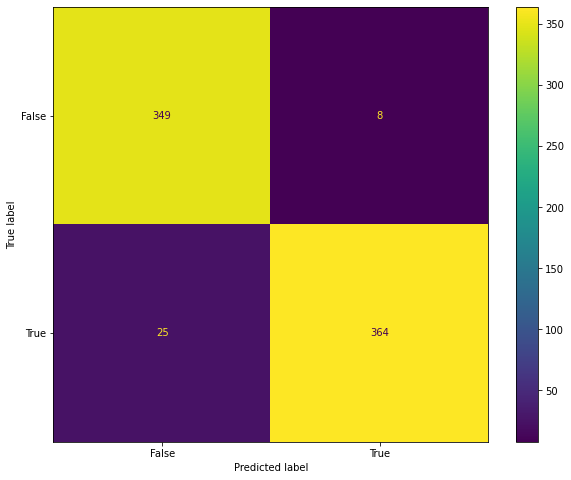

              precision    recall  f1-score   support

       False       0.93      0.98      0.95       357
        True       0.98      0.94      0.96       389

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746



In [ ]:
print("Training Accuracy :", model_SVM_lin.score(X_train_sfs, y_train))
print("Testing Accuracy :", model_SVM_lin.score(X_test_sfs, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM_lin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVM_lin.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_SVM_lin)
print(cr)

In [ ]:
# Quadratic SVM Model
from sklearn.svm import SVC
model_SVM_quad = SVC(kernel='poly', degree = 2, random_state = 0)
sfs_SVM_quad = SequentialFeatureSelector(model_SVM_quad, n_features_to_select = 10, cv =5, direction='backward')
sfs_SVM_quad.fit(X_train, y_train)
print(X.columns[sfs_SVM_quad.get_support()])

Index(['Administrative', 'Informational', 'ProductRelated', 'PageValues',
       'Browser', 'Region', 'TrafficType', 'Month_Mar', 'Month_Nov',
       'VisitorType_Returning_Visitor'],
      dtype='object')


In [ ]:
X_train_sfs = sfs_SVM_quad.transform(X_train)
X_test_sfs = sfs_SVM_quad.transform(X_test)

model_SVM_quad.fit(X_train_sfs, y_train)
y_pred_SVM_quad = model_SVM_quad.predict(X_test_sfs)

Training Accuracy : 0.8514917867918204
Testing Accuracy : 0.8525469168900804


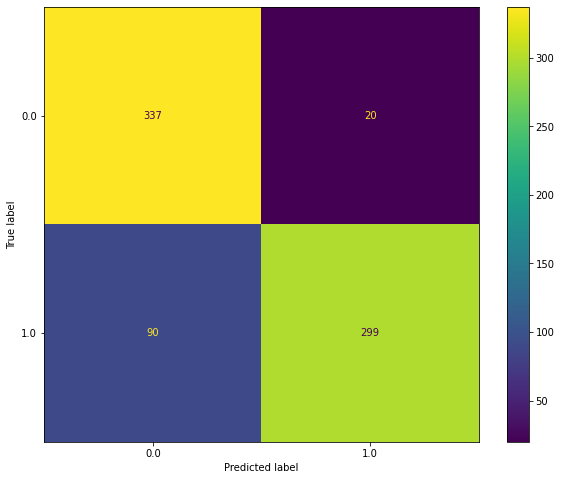

              precision    recall  f1-score   support

       False       0.79      0.94      0.86       357
        True       0.94      0.77      0.84       389

    accuracy                           0.85       746
   macro avg       0.86      0.86      0.85       746
weighted avg       0.87      0.85      0.85       746



In [ ]:
print("Training Accuracy :", model_SVM_quad.score(X_train_sfs, y_train))
print("Testing Accuracy :", model_SVM_quad.score(X_test_sfs, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM_quad)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVM_quad.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_SVM_quad)
print(cr)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
sfs_knn = SequentialFeatureSelector(model_knn, n_features_to_select = 10, cv =5, direction='backward')
sfs_knn.fit(X_train, y_train)
print(X.columns[sfs_knn.get_support()])

Index(['Informational', 'PageValues', 'Weekend', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_June', 'Month_Mar', 'Month_Oct', 'Month_Sep'],
      dtype='object')


In [ ]:
X_train_sfs = sfs_knn.transform(X_train)
X_test_sfs = sfs_knn.transform(X_test)

model_knn.fit(X_train_sfs, y_train)
y_pred_knn = model_knn.predict(X_test_sfs)

Training Accuracy : 0.9772041568890378
Testing Accuracy : 0.967828418230563


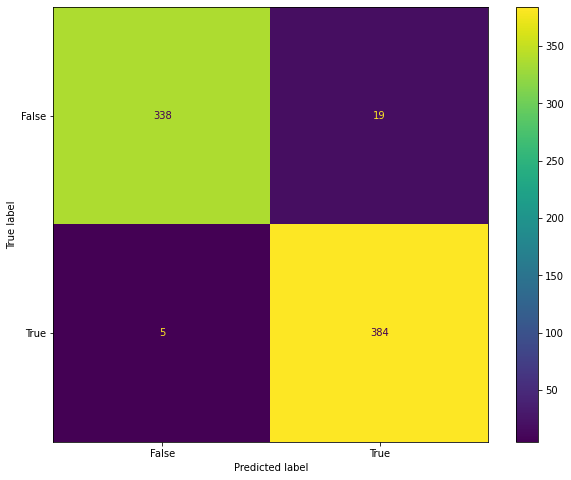

              precision    recall  f1-score   support

       False       0.99      0.95      0.97       357
        True       0.95      0.99      0.97       389

    accuracy                           0.97       746
   macro avg       0.97      0.97      0.97       746
weighted avg       0.97      0.97      0.97       746



In [ ]:
print("Training Accuracy :", model_knn.score(X_train_sfs, y_train))
print("Testing Accuracy :", model_knn.score(X_test_sfs, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_knn)
print(cr)

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
sfs_rf = SequentialFeatureSelector(model_rf, n_features_to_select = 10, cv =5, direction='backward')
sfs_rf.fit(X_train, y_train)
print(X.columns[sfs_rf.get_support()])

Index(['Informational', 'ProductRelated', 'ExitRates', 'PageValues',
       'TrafficType', 'Weekend', 'Month_Feb', 'Month_Mar', 'Month_Nov',
       'VisitorType_Other'],
      dtype='object')


In [ ]:
X_train_sfs = sfs_rf.transform(X_train)
X_test_sfs = sfs_rf.transform(X_test)

model_rf = model_rf.fit(X_train_sfs,y_train)
y_pred_rf = model_rf.predict(X_test_sfs)

Training Accuracy : 1.0
Testing Accuracy : 0.9611260053619303


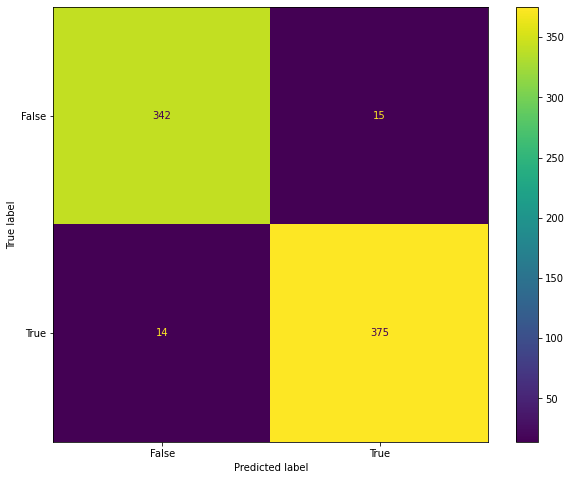

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       357
        True       0.96      0.96      0.96       389

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746



In [ ]:
print("Training Accuracy :", model_rf.score(X_train_sfs, y_train))
print("Testing Accuracy :", model_rf.score(X_test_sfs, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_rf)
print(cr)

In [ ]:
# Neural Network Classifier
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
model_nn = Sequential()
model_nn.add(Dense(units = 64, activation = 'relu', input_dim = 28))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 32, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 16, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose=2)
y_pred_nn = model_nn.predict(X_test)
y_pred_nn = np.round(y_pred_nn).astype(int)

Epoch 1/100
94/94 - 3s - loss: 11.4221 - accuracy: 0.5464 - 3s/epoch - 30ms/step
Epoch 2/100
94/94 - 0s - loss: 2.5257 - accuracy: 0.5585 - 346ms/epoch - 4ms/step
Epoch 3/100
94/94 - 0s - loss: 1.0719 - accuracy: 0.5535 - 339ms/epoch - 4ms/step
Epoch 4/100
94/94 - 0s - loss: 0.7558 - accuracy: 0.5873 - 279ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.7289 - accuracy: 0.6235 - 330ms/epoch - 4ms/step
Epoch 6/100
94/94 - 0s - loss: 0.7479 - accuracy: 0.6195 - 222ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.6403 - accuracy: 0.6460 - 224ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.6852 - accuracy: 0.6584 - 210ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.6632 - accuracy: 0.6443 - 302ms/epoch - 3ms/step
Epoch 10/100
94/94 - 0s - loss: 0.6908 - accuracy: 0.6651 - 245ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.6602 - accuracy: 0.6815 - 262ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.6626 - accuracy: 0.6986 - 258ms/epoch - 3ms/step
Epoch 13/100
9

In [ ]:
print("Training Accuracy :", model_nn.evaluate(X_train, y_train, verbose=0)[1])
print("Testing Accuracy :", model_nn.evaluate(X_test, y_test, verbose=0)[1])

from tensorflow.math import confusion_matrix
# confusion matrix
disp = confusion_matrix(y_test, y_pred_nn)
print(disp)

# classification report
cr = model_nn.summary()
print(cr)

Training Accuracy : 0.9648005366325378
Testing Accuracy : 0.9651474356651306
tf.Tensor(
[[340  17]
 [  9 380]], shape=(2, 2), dtype=int32)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1856      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)        